# Predicting Label in IRIS_DATA with Random Forest

Let's start with importing the required libs :

In [36]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict, Counter

And tune pandas display options:

In [32]:
pd.set_option('display.width', 3000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

#### Importing base data

The first step is to get our machine learning dataset:

In [34]:
from sklearn.datasets import load_iris
from sklearn import tree
iris=load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head())
df['target']=iris.target


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


#### Modeling

Before actually creating our model, we need to split the datasets into their features and labels parts:

In [37]:
#train-test split
X_train, X_test,y_train,y_test=train_test_split(df.drop(['target'],axis='columns'),iris.target, test_size=0.2)

Now we can finally create our model!

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,
    random_state=1337,
    max_depth=6,
    min_samples_leaf=1,
    verbose=2)

We set "class_weight" as the weighting strategy:

In [39]:
clf.class_weight = "balanced"

... And train the model

In [40]:
%time clf.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=1337, verbose=2, warm_start=False)

Build up our result dataset

The model is now trained, we can apply it to our test set:

In [43]:
clf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9333333333333333

Let's have a look at feature importances

AxesSubplot(0.125,0.125;0.775x0.755)


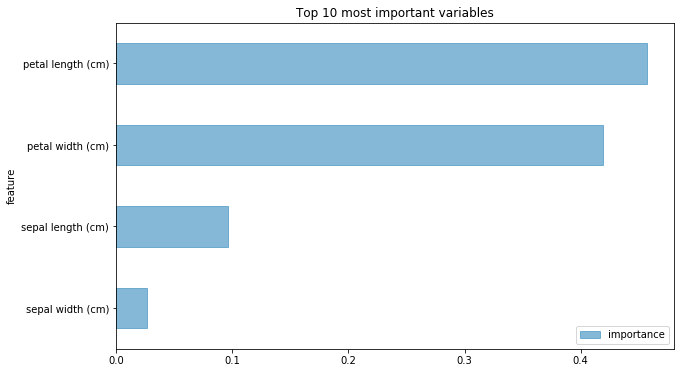

In [47]:
feature_importances_data = []
features = X_train.columns
for feature_name, feature_importance in zip(features, clf.feature_importances_):
    feature_importances_data.append({
        'feature': feature_name,
        'importance': feature_importance
    })

# Plot the results
print(pd.DataFrame(feature_importances_data)\
    .set_index('feature')\
    .sort_values(by='importance')[-10::]\
    .plot(title='Top 10 most important variables',
          kind='barh',
          figsize=(10, 6),
          color='#348ABD',
          alpha=0.6,
          lw='1',
          edgecolor='#348ABD',
          grid=False,))

#### Results

You can measure the model's accuracy:

In [45]:
from dataiku.doctor.utils.metrics import mroc_auc_score
y_test_ser = pd.Series(y_test)
 
print ('AUC value:', mroc_auc_score(y_test_ser, _probas))

AUC value: 0.9924242424242423
